<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/PCA_y__Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this code we can analyze the principal components method for dimensionality reduction.

In [2]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d camnugent/california-housing-prices
!unzip /content/california-housing-prices.zip
import pandas as pd
datos=pd.read_csv('/content/housing.csv')
from IPython.display import clear_output
clear_output()

In [10]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
datos["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

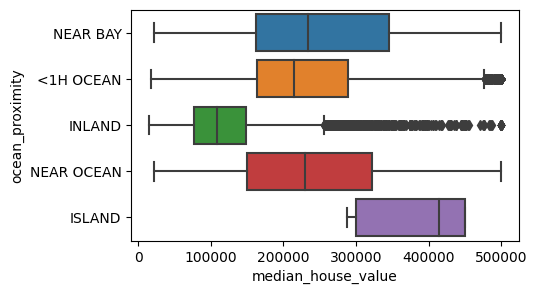

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize = (5, 3))

sns.boxplot(x = datos["median_house_value"],
            y = datos["ocean_proximity"])

Total data (20640, 10)
Number of outliers 965


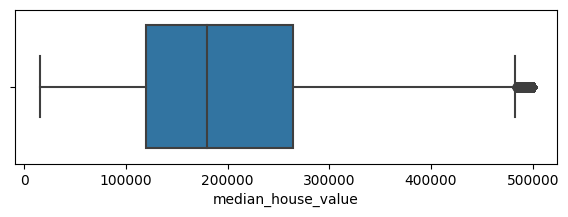

In [41]:
fig, ax = plt.subplots(figsize = (7, 2))

# Equivalente a:
sns.boxplot(x = "median_house_value", data = datos)

print("Total data", datos.shape)
print("Number of outliers",(datos["median_house_value"]>500000).sum())

In [85]:
# Remove outliers

y=datos[datos.median_house_value<500000].median_house_value
X=datos[datos.median_house_value<500000].drop(['median_house_value'], axis=1)

print("Total data",X.shape)


Total data (19648, 9)


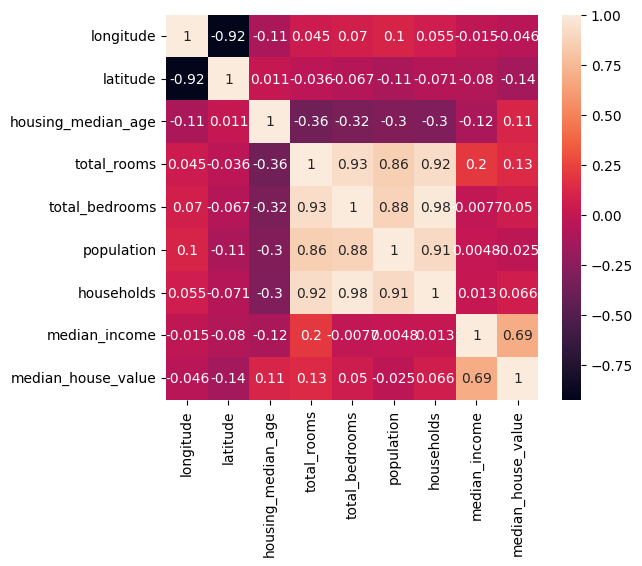

In [89]:
corr_df = datos.corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True)
clear_output()
plt.show()


# Prediction with the original data and without outliers

In [60]:
miss_values_count = X.isnull().sum(0)
#miss_values_count = miss_values_count[miss_values_count != 0]
miss_values_count

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [90]:
X_train=X_train.fillna(X_train.mean())
X_test=X_test.fillna(X_test.mean())

miss_values_count = X_train.isnull().sum(0)
clear_output()
miss_values_count

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_test= X_test.copy()

feature_categorical=['ocean_proximity']
# Apply ordinal encoder to each column with categorical data

label_X_train['ocean_proximity'] = labelencoder.fit_transform(X_train[feature_categorical])
label_X_test['ocean_proximity'] =labelencoder.transform(X_test[feature_categorical])
clear_output()
label_X_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4481,-118.18,34.06,27.0,2025.0,565.0,2189.0,577.0,2.6083,0
158,-122.23,37.81,52.0,2814.0,365.0,878.0,352.0,7.5080,3
9454,-123.23,39.77,25.0,2075.0,435.0,991.0,377.0,1.2281,1


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


#Regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X =label_X_train, y = y_train)
prediccion= modelo_lineal.predict(X=label_X_test)

#metricas
print("R^2 in train:",modelo_lineal.score(label_X_train,y_train))
print("R^2 in test:",modelo_lineal.score(label_X_test,y_test))
error_absoluto_medio = metrics.mean_absolute_error(y_test, prediccion)
error_cuadratico_medio= metrics.mean_squared_error(y_test,prediccion)
print('error_absoluto_medio:',error_absoluto_medio)
print('error_cuadratico_medio: ',error_cuadratico_medio)
print('raís de error cuadratico: ',np.sqrt(MSE(y_test,prediccion)))



R^2 in train: 0.6034461520649066
R^2 in test: 0.5988695636910496
error_absoluto_medio: 46167.25091203303
error_cuadratico_medio:  3858677802.267559
raís de error cuadratico:  62118.256593915765


In [78]:
#Estandarizar las variables , aplicar pca y realizar regresión lineal

modelado = make_pipeline(StandardScaler(), PCA(n_components=6), LinearRegression())
modelado.fit(X=label_X_train, y=y_train)
predicciones = modelado.predict(X=label_X_test)


In [79]:
# Metricas con resultados de PCA
print("R^2 in train:",modelado.score(label_X_train,y_train))
print("R^2 in test:",modelado.score(label_X_test,y_test))
error_absoluto_medio = metrics.mean_absolute_error(y_test, predicciones)
error_cuadratico_medio = metrics.mean_squared_error(y_test,predicciones)
print('error_absoluto_medio:',error_absoluto_medio)
print('error_cuadratico_medio: ',error_cuadratico_medio)
print('raís de error cuadratico: ',np.sqrt(MSE(y_test,prediccion)))


R^2 in train: 0.4867983408986255
R^2 in test: 0.48366446854260636
error_absoluto_medio: 53523.085913303396
error_cuadratico_medio:  4966894240.411475
raís de error cuadratico:  62118.256593915765


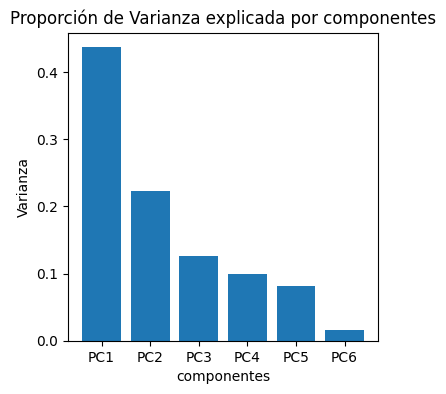

In [84]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

plt.figure(figsize=(4, 4))
eje_x =['PC1','PC2','PC3','PC4','PC5','PC6']

# Declaramos valores para el eje y
eje_y =modelado.named_steps['pca'].explained_variance_ratio_

## Creamos Gráfica
plt.bar(eje_x, eje_y)

## Legenda en el eje y
plt.ylabel('Varianza')

## Legenda en el eje x
plt.xlabel('componentes')

## Título de Gráfica
plt.title('Proporción de Varianza explicada por componentes')

## Mostramos Gráfica
plt.show()

**Conclusion:** In this case, PCA was implemented to mitigate the effects of correlation in the original data set, however, as can be seen, considering the first 6 components, I do not guarantee obtaining a model with greater predictive capacity considering the linear regression model.